# Aprendizaje Supervisado

## Regresión
### Regresión Lineal Simple 

Ejemplo: Suponiendo los siguientes datos: 

|Tamaño (m²) | Precio (USD)|
|:----------:|:-----------:|
| 50 | 100 |
| 80 | 150 |
| 120 | 200 |

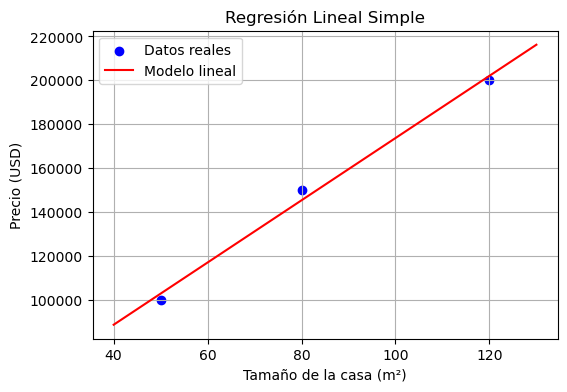

Intercepto (β₀): 31756.75675675676
Pendiente (β₁): 1418.918918918919


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos de ejemplo
X = np.array([[50], [80], [120]])  # Tamaño de la casa (m²)
y = np.array([100000, 150000, 200000])  # Precio

# Crear y ajustar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Predicciones
X_pred = np.linspace(40, 130, 100).reshape(-1, 1)
y_pred = modelo.predict(X_pred)

# Visualización
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X_pred, y_pred, color='red', label='Modelo lineal')
plt.xlabel('Tamaño de la casa (m²)')
plt.ylabel('Precio (USD)')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid()
plt.show()

# Coeficientes
print(f"Intercepto (β₀): {modelo.intercept_}")
print(f"Pendiente (β₁): {modelo.coef_[0]}")

**Evaluación del Modelo**

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Datos reales y predicciones
y_real = y
y_pred_real = modelo.predict(X)

# Cálculo de métricas
mae = mean_absolute_error(y_real, y_pred_real)
mse = mean_squared_error(y_real, y_pred_real)
rmse = np.sqrt(mse)
r2 = r2_score(y_real, y_pred_real)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 3153.15
MSE: 11261261.26
RMSE: 3355.78
R²: 0.9932


### Ejemplo Regresión: Dataset California Housing

El dataset California Housing fue creado a partir del censo de 1990 en California (EE. UU.). Su objetivo es predecir el valor medio de las viviendas en distintos bloques geográficos, a partir de datos socioeconómicos y demográficos. 

Variable objetivo (y): ```MedHouseVal```: valor medio de la vivienda (en centenas de miles de dólares) 

1. Importación de librearías

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

2. Preparación del dataset

In [13]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Mediana del valor de la vivienda (en cientos de miles)

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")

Dimensiones de X_train: (16512, 8)
Dimensiones de y_train: (16512,)


3. Creación y entrenamiento del modelo de Regresión Lineal

In [15]:
modelo = LinearRegression()
modelo.fit(X_train, y_train) 

LinearRegression()

4. Predicción del conjunto de prueba

In [16]:
y_pred = modelo.predict(X_test)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

5. Evaluación del modelo

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluación del Modelo:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.4f}")

Evaluación del Modelo:
MAE: 0.533
MSE: 0.556
RMSE: 0.746
R²: 0.5758


6. Visualización de valores predichos vs. valore reales

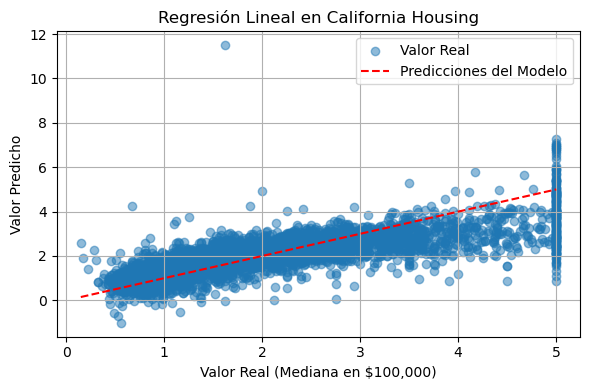

In [18]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor Real (Mediana en $100,000)")
plt.ylabel("Valor Predicho")
plt.title("Regresión Lineal en California Housing")
plt.grid(True)
plt.legend(["Valor Real", "Predicciones del Modelo"])
plt.tight_layout()
plt.show()

## Clasificación

### k-Nearest Neighbors k-NN
Ejemplo de k-NN para clasificar el dataset Iris, dado que este es multiclas y pequeño. 

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Cargar datos
iris = load_iris()
X, y = iris.data, iris.target

# 2. Escalar datos (importante para k-NN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Entrenar modelo k-NN
modelo_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform')
modelo_knn.fit(X_train, y_train)

# 5. Predicciones y evaluación
y_pred = modelo_knn.predict(X_test)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Matriz de Confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Ejemplo de clasificación y visualización de k-NN

Matriz de Confusión:
 [[12  2  6]
 [ 3 15  1]
 [ 0  0 21]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.88      0.79      0.83        19
           2       0.75      1.00      0.86        21

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.79        60
weighted avg       0.81      0.80      0.79        60



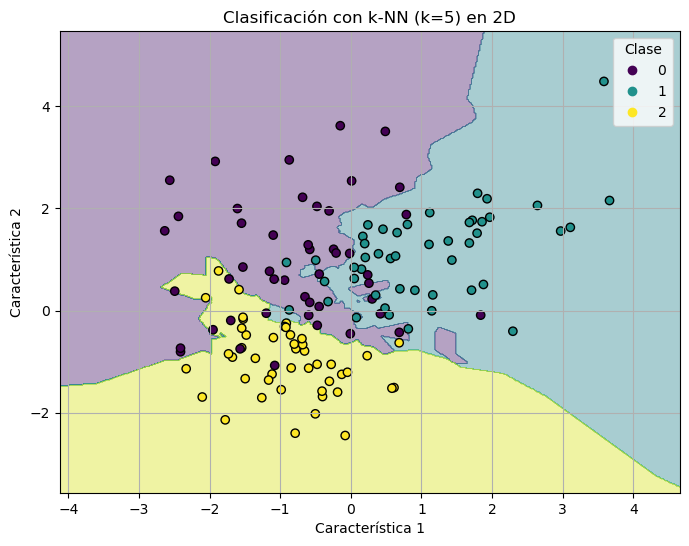

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 1. Crear un conjunto de datos 2D
X, y = make_classification(
    n_samples=200,  # Número de muestras
    n_features=2,  # Solo dos características
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=42,
)

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Entrenar el modelo k-NN
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X_train, y_train)

# 4. Visualización de regiones de decisión
import numpy as np

y_pred = modelo.predict(X_test) 
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Crear una malla de puntos (rejilla) para cubrir el espacio de características
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir la clase para cada punto de la malla
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la región de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap="viridis")

# Dibujar los puntos de entrenamiento
scatter = plt.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", cmap="viridis"
)
plt.title("Clasificación con k-NN (k=5) en 2D")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend(*scatter.legend_elements(), title="Clase")
plt.grid(True)
plt.show()

### Árboles de Decisión (Decision Trees)

Ejemplo de clasificación con Árboles de Decisión y el conjunto de datos Iris

Matriz de confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



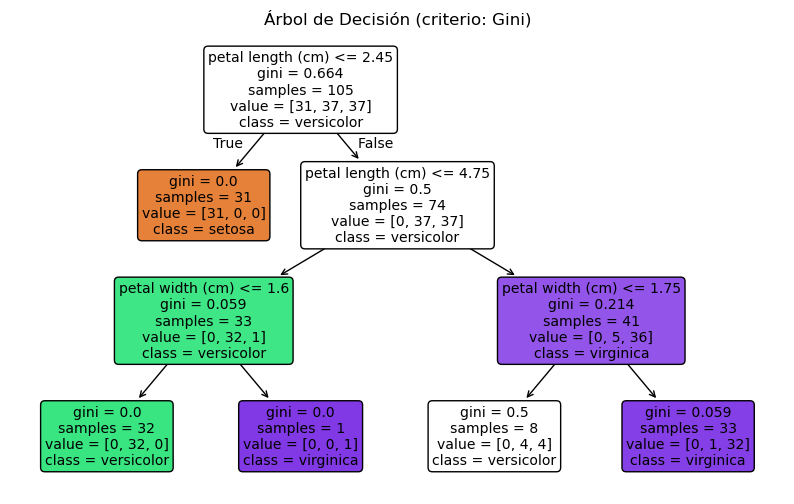

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Cargar datos
iris = load_iris()
X, y = iris.data, iris.target

# 2. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Crear y entrenar modelo de Árbol de Decisión
modelo = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
modelo.fit(X_train, y_train)

# 4. Evaluar modelo
y_pred = modelo.predict(X_test)
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# 5. Visualizar el árbol
plt.figure(figsize=(10, 6))
plot_tree(
    modelo,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
)
plt.title("Árbol de Decisión (criterio: Gini)")
plt.show()